<a href="https://colab.research.google.com/github/Spatro123/My-Assignments-/blob/main/Statistics_Advance_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. What is a random variable in probability theory?
A **random variable** is a numerical quantity whose value depends on the outcome of a random phenomenon. It maps outcomes of a probabilistic experiment to real numbers.


### 2. What are the types of random variables?
- **Discrete random variables:** take countable values (e.g., 0,1,2,...).
- **Continuous random variables:** take values from a continuous range (e.g., real numbers in an interval).




### 3. What is the difference between discrete and continuous distributions?
- **Discrete distributions** assign probability mass to individual values (PMF). Probabilities sum to 1.
- **Continuous distributions** use a probability density function (PDF); probabilities for exact points are zero and probabilities are computed over intervals via integration.

### 4. What are probability distribution functions (PDF)?
For continuous variables, a **PDF** is a function f(x) such that the probability that the variable lies in an interval [a,b] is the integral of f(x) over [a,b]. For discrete variables the analogous function is the PMF.

### 5. How do cumulative distribution functions (CDF) differ from PDFs?
- **CDF** F(x) = P(X ≤ x) gives cumulative probability up to x and applies to both discrete and continuous variables.
- **PDF/PMF** gives density or mass at a point (for continuous, density; for discrete, actual probability).


### 6. What is a discrete uniform distribution?
A discrete uniform distribution assigns equal probability to a finite set of values (e.g., rolling a fair die yields {1,...,6} each with probability 1/6).


### 7. What are the key properties of a Bernoulli distribution?
A Bernoulli distribution models a single trial with two outcomes: success (probability p) or failure (probability 1−p). Mean = p, variance = p(1−p).


### 8. What is the binomial distribution and how is it used?
Binomial models the number of successes in n independent Bernoulli trials with constant success probability p. Useful for counts like number of heads in n coin tosses.


### 9. What is the Poisson distribution and where is it applied?
Poisson models counts of events in a fixed interval when events occur independently at a constant average rate λ. Used for rare event counts (calls per hour, arrivals, defects).


### 10. What is a continuous uniform distribution?
A continuous uniform distribution on [a,b] has constant density f(x)=1/(b−a) for a ≤ x ≤ b. All subintervals of equal length have equal probability.

### 11. Characteristics of a normal distribution
- Symmetric, bell-shaped, completely described by mean μ and standard deviation σ.
- Mean = median = mode. Useful due to CLT and analytical properties.


### 12. What is the standard normal distribution, and why is it important?
Standard normal is N(0,1) with mean 0 and SD 1. Many results use it for tabulated probabilities and to compute Z-scores; other normals can be standardized to it.


### 13. What is the Central Limit Theorem (CLT) and why is it critical?
CLT states that the sampling distribution of the sample mean (or sum) of i.i.d. variables with finite mean and variance approaches a normal distribution as sample size grows, regardless of original distribution. This justifies normal-based inference for large samples.


### 14. How does the CLT relate to the normal distribution?
CLT explains why sums/means are approximately normal for large n even when individual observations are not normal.


### 15. What is the application of Z statistics in hypothesis testing?
Z-statistics standardize a sample statistic when population variance is known (or sample large) to test hypotheses about population mean using standard normal distribution.


### 16. How do you calculate a Z-score and what does it represent?
Z = (X − μ) / σ for a value X; it represents how many standard deviations X is away from the mean.


### 17. What are point estimates and interval estimates?
- **Point estimate:** single best value (e.g., sample mean) used as estimate of population parameter.
- **Interval estimate:** range of plausible values (e.g., confidence interval) that likely contains the parameter.


### 18. What is the significance of confidence intervals?
Confidence intervals quantify uncertainty of estimates, giving a range that, under repeated sampling, contains the true parameter a specified proportion of times (e.g., 95%).


### 19. Relationship between Z-score and confidence interval
Confidence intervals for means often use critical Z-values (e.g., 1.96 for 95%) to expand the point estimate by margin of error: mean ± Z*(σ/√n).


### 20. How are Z-scores used to compare different distributions?
Z-scores standardize observations from different distributions to the same scale, allowing comparison of relative positions.


### 21. Assumptions for applying the CLT
- Observations are independent and identically distributed (i.i.d) with finite mean and variance. For practical purposes, moderate sample sizes (n≥30) often suffice.


### 22. What is expected value in a probability distribution?
Expected value (mean) is the long-run average value of the random variable: sum (or integral) of x times its probability (or density).


### 23. How does a probability distribution relate to expected outcome?
The distribution determines probabilities for outcomes; expected value gives the weighted average outcome according to those probabilities.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import comb, factorial, exp, sqrt
from statistics import mean

plt.rcParams['figure.figsize'] = (7,4)
np.random.seed(42)


### A — Generate a random variable and display its value


In [2]:
# Generate a random continuous variable from Uniform(0,1)
rv_value = np.random.rand()
rv_value

0.3745401188473625

### B — Discrete uniform distribution and PMF plot (e.g., fair die)


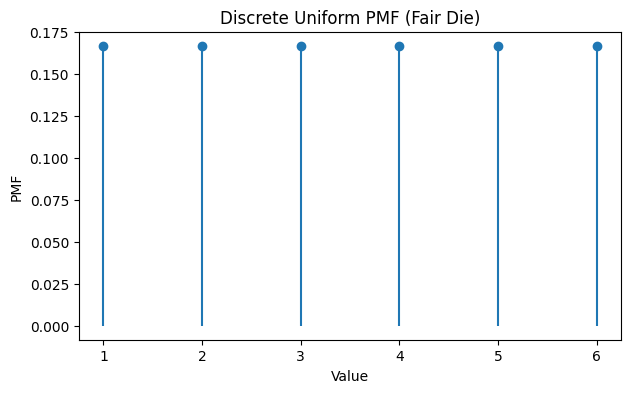

In [3]:
values = np.arange(1,7)
probs = np.ones_like(values) / len(values)
plt.figure()
plt.stem(values, probs, basefmt=' ')
plt.xlabel('Value')
plt.ylabel('PMF')
plt.title('Discrete Uniform PMF (Fair Die)')
plt.show()

### C — Bernoulli PMF function


In [4]:
def bernoulli_pmf(k, p):
    # k should be 0 or 1
    if k not in (0,1):
        return 0.0
    return (p if k==1 else 1-p)

# Example: p=0.3
bernoulli_pmf(1, 0.3), bernoulli_pmf(0, 0.3)

(0.3, 0.7)

### D — Simulate binomial distribution (n=10, p=0.5) and plot histogram


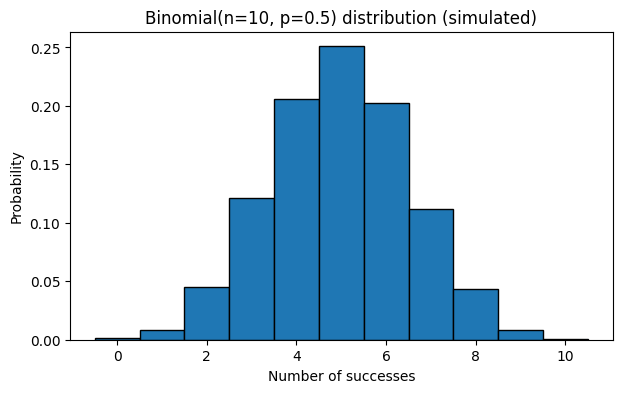

In [5]:
n, p = 10, 0.5
samples = np.random.binomial(n, p, size=10000)
plt.figure()
plt.hist(samples, bins=np.arange(-0.5, n+1, 1), density=True, edgecolor='black')
plt.xlabel('Number of successes')
plt.ylabel('Probability')
plt.title('Binomial(n=10, p=0.5) distribution (simulated)')
plt.show()

### E — Create and visualize Poisson distribution (λ=3)


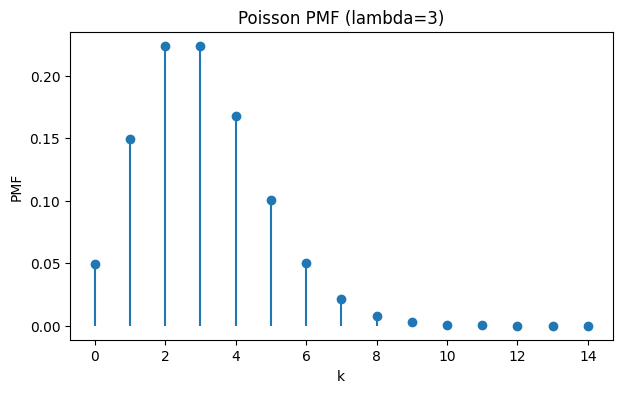

In [6]:
lam = 3
k_values = np.arange(0, 15)
poisson_pmf = [exp(-lam) * (lam**k) / factorial(k) for k in k_values]
plt.figure()
plt.stem(k_values, poisson_pmf, basefmt=' ')
plt.xlabel('k')
plt.ylabel('PMF')
plt.title(f'Poisson PMF (lambda={lam})')
plt.show()

### F — CDF of discrete uniform distribution


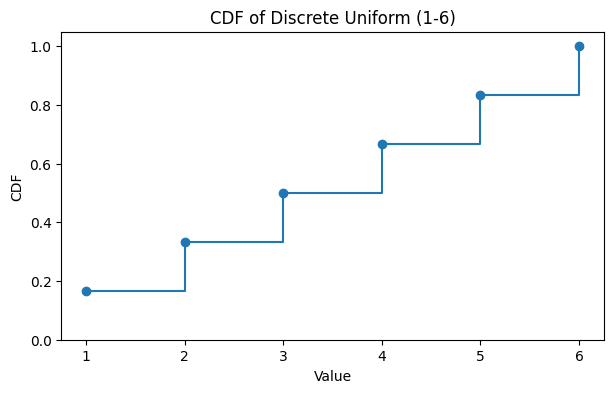

In [7]:
values = np.arange(1,7)
pmf = np.ones_like(values) / len(values)
cdf = np.cumsum(pmf)
plt.figure()
plt.step(values, cdf, where='post')
plt.scatter(values, cdf)
plt.xlabel('Value')
plt.ylabel('CDF')
plt.title('CDF of Discrete Uniform (1-6)')
plt.ylim(0,1.05)
plt.show()

### G — Continuous uniform distribution visualization


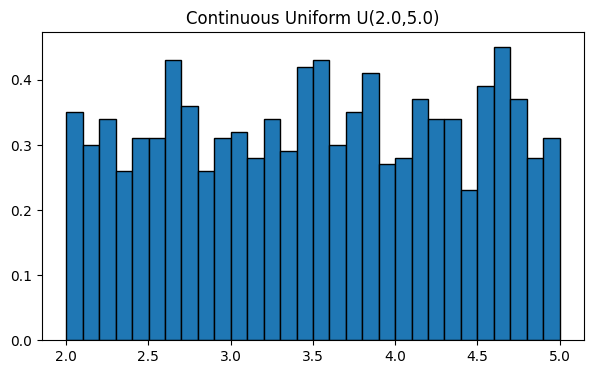

In [8]:
a, b = 2.0, 5.0
samples_uniform = np.random.uniform(a, b, size=1000)
plt.figure()
plt.hist(samples_uniform, bins=30, density=True, edgecolor='black')
plt.title(f'Continuous Uniform U({a},{b})')
plt.show()

### H — Simulate normal distribution and plot histogram


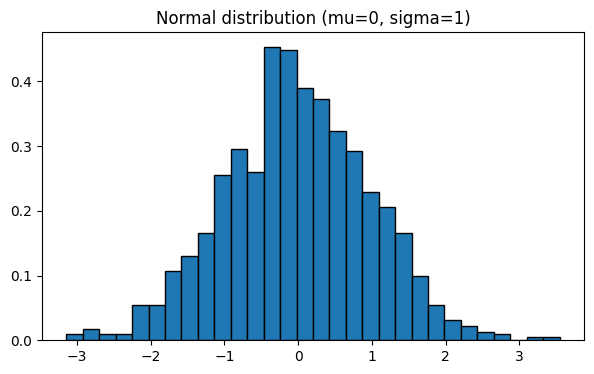

In [9]:
mu, sigma = 0, 1
samples_normal = np.random.normal(mu, sigma, size=1000)
plt.figure()
plt.hist(samples_normal, bins=30, density=True, edgecolor='black')
plt.title('Normal distribution (mu=0, sigma=1)')
plt.show()

### I — Z-score function and plot


In [10]:
def z_scores(arr):
    arr = np.array(arr)
    return (arr - arr.mean()) / arr.std(ddof=0)

data_example = np.array([10, 12, 9, 15, 11, 8, 13])
zs = z_scores(data_example)
zs


array([-0.51214752,  0.38411064, -0.9602766 ,  1.72849788, -0.06401844,
       -1.40840568,  0.83223972])

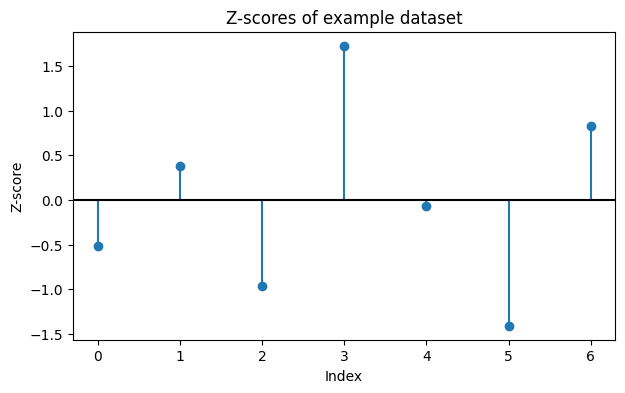

In [11]:
plt.figure()
plt.stem(range(len(zs)), zs, basefmt=' ')
plt.axhline(0, color='black')
plt.xlabel('Index')
plt.ylabel('Z-score')
plt.title('Z-scores of example dataset')
plt.show()

### J — Implement Central Limit Theorem (CLT) for a non-normal distribution
We will draw many sample means from an exponential distribution (skewed) and observe that their distribution approaches normal as sample size increases.


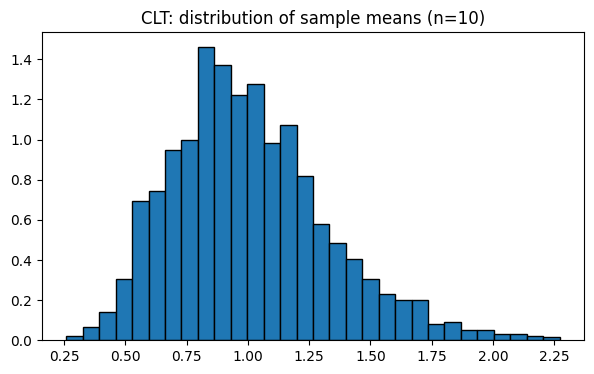

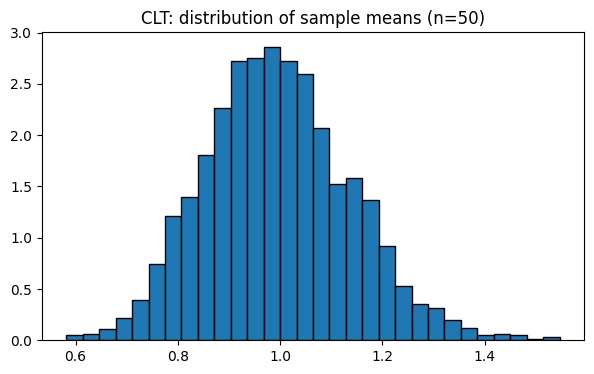

In [12]:
def demonstrate_clt(pop_dist_func, pop_params, sample_size=30, n_samples=2000):
    # generate many sample means
    sample_means = []
    for _ in range(n_samples):
        s = pop_dist_func(*pop_params, size=sample_size)
        sample_means.append(s.mean())
    sample_means = np.array(sample_means)
    plt.figure()
    plt.hist(sample_means, bins=30, density=True, edgecolor='black')
    plt.title(f'CLT: distribution of sample means (n={sample_size})')
    plt.show()
    return sample_means

# Exponential population (skewed)
sample_means_n10 = demonstrate_clt(np.random.exponential, (1.0,), sample_size=10, n_samples=2000)
sample_means_n50 = demonstrate_clt(np.random.exponential, (1.0,), sample_size=50, n_samples=2000)


### K — Simulate multiple samples from a normal distribution and verify CLT (practical task)


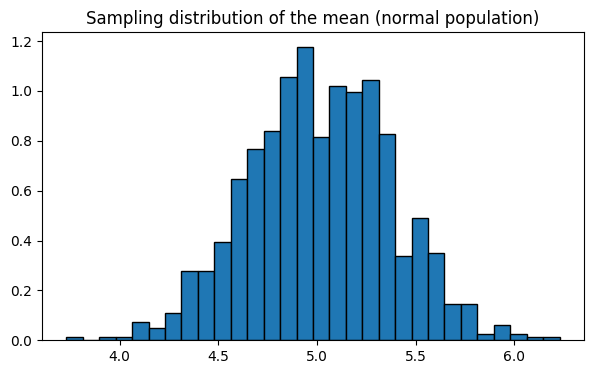

In [13]:
def simulate_normal_samples(mu=5, sigma=2, sample_size=30, n_samples=1000):
    means = [np.random.normal(mu, sigma, sample_size).mean() for _ in range(n_samples)]
    plt.figure()
    plt.hist(means, bins=30, density=True, edgecolor='black')
    plt.title('Sampling distribution of the mean (normal population)')
    plt.show()
    return means

norm_sample_means = simulate_normal_samples()


### L — Plot standard normal distribution (PDF)


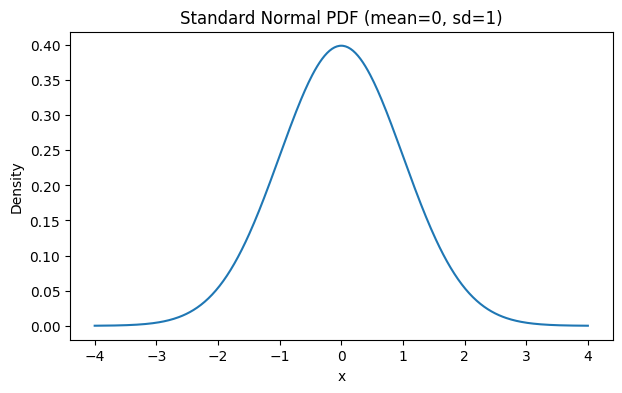

In [14]:
def standard_normal_pdf(x):
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)

x = np.linspace(-4,4,400)
y = standard_normal_pdf(x)
plt.figure()
plt.plot(x, y)
plt.title('Standard Normal PDF (mean=0, sd=1)')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()


### M — Binomial probabilities for generated random variables


In [15]:
def binomial_pmf(n, k, p):
    return comb(n, k) * (p**k) * ((1-p)**(n-k))

# Generate some k values and compute probabilities
n, p = 10, 0.4
k_vals = np.arange(0, n+1)
pmf_vals = [binomial_pmf(n, k, p) for k in k_vals]
list(zip(k_vals, pmf_vals))[:6]  # show first 6


[(np.int64(0), np.float64(0.006046617599999997)),
 (np.int64(1), np.float64(0.04031078399999999)),
 (np.int64(2), np.float64(0.12093235199999998)),
 (np.int64(3), np.float64(0.21499084799999998)),
 (np.int64(4), np.float64(0.250822656)),
 (np.int64(5), np.float64(0.2006581248))]

### N — Z-score calculation and comparison to standard normal


In [16]:
def z_score(x, mu, sigma):
    return (x - mu) / sigma

x_value = 78
sample_mu = 70
sample_sigma = 8
z = z_score(x_value, sample_mu, sample_sigma)
z


1.0

### O — Hypothesis testing using Z-statistic (one-sample) — implement Z-test

Assume known population sigma. H0: μ = μ0. Compute Z = (x̄ − μ0) / (σ/√n)


In [17]:
def z_test_one_sample(x_bar, mu0, sigma, n, alpha=0.05):
    z_stat = (x_bar - mu0) / (sigma / np.sqrt(n))
    # two-sided p-value
    from math import erf
    # compute p-value from z using survival function of normal
    p_value = 2 * (1 - 0.5 * (1 + erf(abs(z_stat) / np.sqrt(2))))
    return z_stat, p_value

# Example
x_bar = 102
mu0 = 100
sigma = 15
n = 36
z_stat, p_val = z_test_one_sample(x_bar, mu0, sigma, n)
z_stat, p_val


(np.float64(0.8), 0.4237107971667933)

### P — Confidence interval for a dataset (mean) — assuming known sigma or large n


In [18]:
def confidence_interval_mean(x, sigma=None, confidence=0.95):
    x = np.array(x)
    n = len(x)
    x_bar = x.mean()
    if sigma is None:
        # use sample std (approximate t); for simplicity use z critical
        sigma = x.std(ddof=0)
    z_crit = 1.96 if confidence==0.95 else 1.645 if confidence==0.90 else 2.576
    moe = z_crit * (sigma / np.sqrt(n))
    return (x_bar - moe, x_bar + moe)

sample_data = np.random.normal(50, 10, size=40)
ci_95 = confidence_interval_mean(sample_data, sigma=None, confidence=0.95)
ci_95


(np.float64(47.893838131629394), np.float64(54.58739585661192))

### Q — PDF of a normal distribution (visualize)


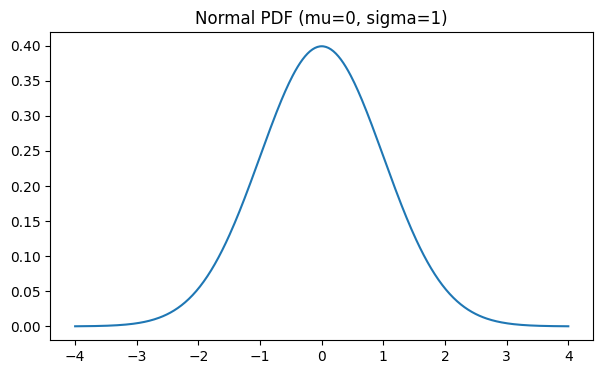

In [19]:
def normal_pdf(x, mu=0, sigma=1):
    return (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x-mu)/sigma)**2)

x = np.linspace(-4, 4, 400)
y = normal_pdf(x, mu=0, sigma=1)
plt.figure()
plt.plot(x, y)
plt.title('Normal PDF (mu=0, sigma=1)')
plt.show()


### R — CDF of Poisson distribution (example λ=4)


In [20]:
def poisson_cdf(lam, k):
    # P(X <= k)
    return sum(exp(-lam) * (lam**i) / factorial(i) for i in range(0, k+1))

lam = 4
k = 3
poisson_cdf(lam, k)


0.4334701203667089

### S — Expected value of a continuous uniform distribution (simulation)


In [21]:
a, b = 0, 10
samples = np.random.uniform(a, b, size=100000)
expected_value_est = samples.mean()
expected_value_theoretical = (a + b) / 2
expected_value_est, expected_value_theoretical


(np.float64(5.008623480425265), 5.0)

### T — Compare standard deviations of two datasets and visualize


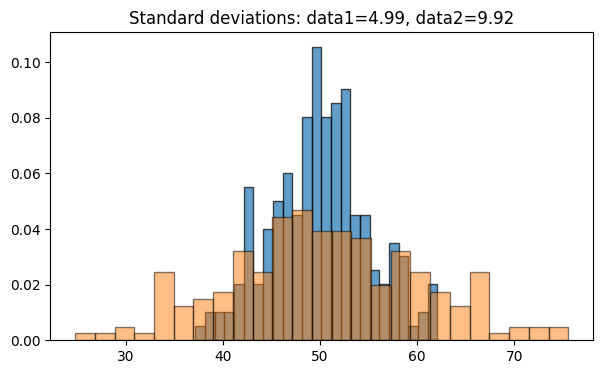

(np.float64(4.98961869979704), np.float64(9.91956178604534))

In [22]:
data1 = np.random.normal(50, 5, size=200)
data2 = np.random.normal(50, 10, size=200)
std1 = data1.std(ddof=0)
std2 = data2.std(ddof=0)
plt.figure()
plt.hist(data1, bins=25, alpha=0.7, density=True, edgecolor='black')
plt.hist(data2, bins=25, alpha=0.5, density=True, edgecolor='black')
plt.title(f'Standard deviations: data1={std1:.2f}, data2={std2:.2f}')
plt.show()
std1, std2


### U — Calculate range and IQR of a normal dataset


In [23]:
normal_data = np.random.normal(100, 15, size=300)
data_range = normal_data.max() - normal_data.min()
IQR = np.percentile(normal_data, 75) - np.percentile(normal_data, 25)
data_range, IQR


(np.float64(83.13559470884248), np.float64(21.027173945219815))

### V — Z-score normalization and visualization


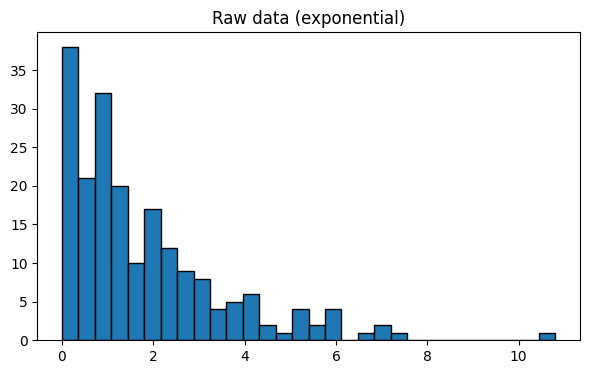

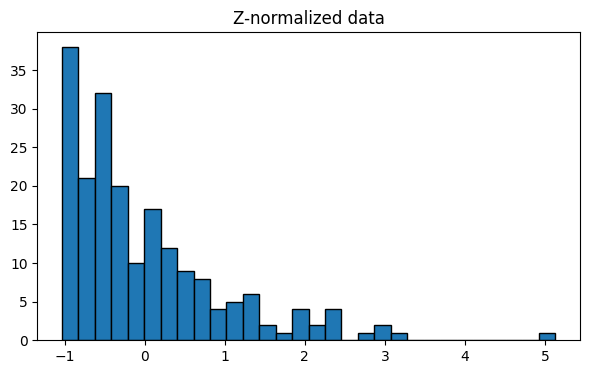

In [24]:
def z_normalize(x):
    x = np.array(x)
    return (x - x.mean()) / x.std(ddof=0)

raw = np.random.exponential(2.0, size=200)
normalized = z_normalize(raw)
plt.figure()
plt.hist(raw, bins=30, edgecolor='black')
plt.title('Raw data (exponential)')
plt.show()
plt.figure()
plt.hist(normalized, bins=30, edgecolor='black')
plt.title('Z-normalized data')
plt.show()


### W — Skewness and kurtosis of a dataset


In [25]:
series = pd.Series(np.random.normal(0,1, size=1000))
skewness = series.skew()
kurt = series.kurtosis()
skewness, kurt


(np.float64(0.045062952712046654), np.float64(-0.07871430327405093))